# Quantitative Data Analysis

In this notebook, I use survey data collected from Amazon Mechanical Turk and Reddit user groups (all personal data  have been removed) in a study to examine the impact of cultural localization on web-based account creation between American and Korean users. I use the experiment data to display basic statistical tests in Python. 

### Research Question:
> **_Is there a difference in providing personal information between USA and Korean Internet users <br>
> within two different use scenarios: online banking and shopping?_**

I use the following tests: 

1. **[Pearson Correlation Coefficient](#1.-Pearson-Correlation-Coefficient)**
2. **[T-Test](#2.-T-Test)**
3. **[Mann-Whitney Test](#3.-Mann-Whitney-Test)**
4. **[One-Way Analysis of Variance (ANOVA)](#4.-One-Way-Analysis-of-Variance-(ANOVA))**
5. **[Two-Way ANOVA](#5.-Two-Way-ANOVA)**


In [1]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import scipy
from matplotlib import pyplot
import matplotlib.pyplot as plt
from statsmodels.formula.api import ols
import statsmodels.formula.api as smf
import statsmodels.api as sm
from statsmodels.stats.anova import AnovaRM
import pdb  # for debugging
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# set color
sns.set_color_codes('pastel')

/anaconda3/envs/py3/lib/python3.6/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## Setup & Querying Data

It is first critical to understand the dataframe to play around and make analysis. Usually, **_long-format_** data is desired (or at least I'm used to it) for using Python and Seaborn for data visualization. Long format is basically when each variable is represented as a column, and each observation or event is a row. Below, we read in, and query the data.

#### Useful commands: 
1. `df.head()`: by default, shows first five rows of df
2. `df.columns()`: prints all the columns in df
3. `df.describe()`: provides summary description of df
3. `pd.read_csv(data, usecols=['col1', 'col2', ...,]`: can be used to filter columns

In [2]:
# read in data.csv file as df & see data structure
df = pd.read_csv('data.csv')

# query data by scenario and culture
bank = df.query("scenario == 'Bank'").copy()
shop = df.query("scenario == 'Shop'").copy()
kor = df.query("culture == 'Korea'").copy()
usa = df.query("culture == 'USA'").copy()

In [3]:
# an example of the data structure
usa.head()

,UserGuid,culture,scenario,interface,complete,first,last,phone,dob,sex,...,address,citizenship,website,password,username,relationship,reason,total,total_possible,percent
0,0,USA,Bank,A,-,1,1,1,2,0,...,3,0,0,3,1,0,-,14,27,0.518519
1,0,USA,Shop,A,-,0,0,0,0,0,...,0,0,0,3,1,0,-,5,24,0.208333
2,0,USA,Bank,B,-,1,1,1,2,0,...,3,0,0,3,1,0,-,14,27,0.518519
3,0,USA,Shop,B,-,0,0,0,0,0,...,0,0,0,3,1,0,-,5,24,0.208333
4,1,USA,Bank,A,-,1,0,0,0,0,...,0,0,0,0,0,0,-,1,27,0.037037


---------------------------
## 1. Pearson Correlation Coefficient

When we want to ask _"how strongly correlated are the two variables?"_, we can use **Perason's Correlation**. It is used to measure statistical relationship or association between two **_continuous variables_** that are linearly related to each other. The coefficient value _"r"_ ranges from -1 (negative relation) to 1 (perfectly positive). 0 would mean that there is no relationship at all. 

### Properties of Pearson Correlation
1. The units of the values do not affect the Pearson Correlation. 
    - i.e. Changing the unit of value from cm to inches do not affect the r value
2. The correlation between the two variables is symmetric: 
    - i.e. A -> B is equal to B -> A
    
** Use **_Spearman's Correlation_** when the two variables have non-linear relationship (e.g. a curve instead of a straight line). 

### Code Implementation
We use scipy package to calculate the Pearson Correlation. The method will return two values: **_r_** and **_p_** value. 

In [4]:
# let's look at the correlation of information provided by different scenarios: online banking vs. shopping
# bank['percent'] will return an array of percentage values

r, p = scipy.stats.pearsonr(bank['percent'], shop['percent'])  
print('r: ' + str(r.round(4)))
print('p: ' + str(p.round(4)))

r: 0.7592
p: 0.0


From the results above, we can see **there is a strong positive relationship between the amount of information provided in banking and shopping.** i.e. Providing information in banking would affect how a user provides personal information in shopping. 

----------------------------------
## 2. T-Test
When comparing the means of two groups, we can use a **t-test**. It takes into account of the means and the spread of the data to determine **_whether a difference between the two would occur by chance or not_** (determined by the p-value being less than 0.05 usually). In a t-test, there should be only two independent variables (categorical/nominal variables) and one dependent continuous variable. 

### Properties of t-test

1. The data is assumed to be **normal** (If the distribution is skewed, use Mann-Whitney test). <br><br>

2. T-test yields **_t_** and **_p_** value:<br>
    2a. **The higher the t, the more difference there is between the two groups.** The lower the t, the more similar the two groups are.<br>
    2b. T-value of 2 means the groups are twice as different from each other than they are within each other<br>
    2c. **The lower the p-value, the better** (meaning that it is significant and the difference did not occure by chance). P-value of 0.05 means that there is 5 percent happening by chance


### Code Implementation
We use scipy package again to run a t-test. Before we decide which test to run, we can quickly plot and see the distribution like below. 


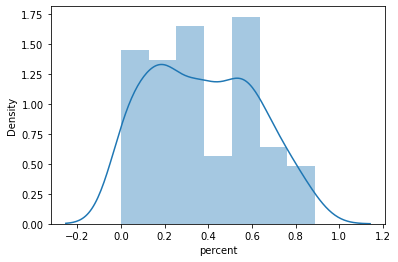

In [5]:
sns.distplot(df[df['scenario'] == 'Bank'].percent)

The distribution looks relatively normal. We can run a t-test to see whether there is a difference between the total amount of information provided by the users from each use scenario: i.e. banking vs. shopping

In [6]:
# we run a t-test to see whether there ia a difference in the amount of information provided in each scenario
t, p = scipy.stats.ttest_ind(df[df['scenario'] == 'Bank'].percent, df[df['scenario'] == 'Shop'].percent)
print('t: ' + str(t.round(4)))
print('p: ' + str(p.round(6)))

t: 4.8203
p: 2e-06


The result above shows that there is a significant difference in the amount of information provided between two use scenarios with t-value being high, and p-value being very small. However, we don't actually know which scenario yields more information than the other. The t-test only tells there is a significant difference. 

To find out, we can create a little fancy distribution plot with some box plots:

[Text(0.5, 0, '')]

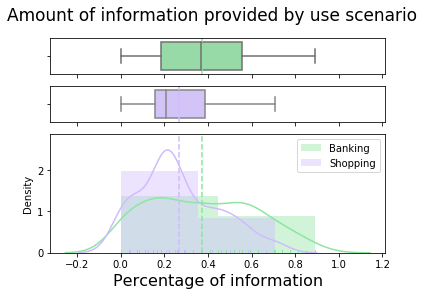

In [7]:
banking = df[df['scenario'] == 'Bank'].percent
shopping = df[df['scenario'] == 'Shop'].percent

# let's plot box-dist plot combined
f, (ax_box1, ax_box2, ax_dist) = plt.subplots(3, sharex=True, 
                                              gridspec_kw= {"height_ratios": (0.3, 0.3, 1)})

# add boxplots at the top
sns.boxplot(banking, ax=ax_box1, color='g')
sns.boxplot(shopping, ax=ax_box2, color='m')
ax_box1.axvline(np.mean(banking), color='g', linestyle='--')
ax_box2.axvline(np.mean(shopping), color='m', linestyle='--')
plt.subplots_adjust(top=0.87)
plt.suptitle('Amount of information provided by use scenario', fontsize = 17)

# add distplots below
sns.distplot(banking, ax=ax_dist, label='Banking', kde=True, rug=True, color='g', norm_hist=True, bins=2)
sns.distplot(shopping, ax=ax_dist, label='Shopping', kde=True, rug=True, color='m', norm_hist=True, bins=2)

ax_dist.axvline(np.mean(banking), color='g', linestyle='--')
ax_dist.axvline(np.mean(shopping), color='m', linestyle='--')
plt.legend()
plt.xlabel('Percentage of information', fontsize=16)
ax_box1.set(xlabel='')
ax_box2.set(xlabel='')

From the graph above, we see that the mean of the banking is greater than the mean of shopping. This shows us that regardless of cultural background, users are more likely to provide personal information in the banking scenario. 

-------------------------------
## 3. Mann-Whitney Test
The Mann-Whitney Test allows you to determine if the observed difference is statistically significant without making the assumption that the values are normally distributed. You should have two independent variables and one continuous dependent variable. 

### Code Implementation 
We can run the test on the same banking vs. shopping scenario. 

In [8]:
t, p = scipy.stats.mannwhitneyu(df[df['scenario'] == 'Bank'].percent, df[df['scenario'] == 'Shop'].percent)
print('t: ' + str(t.round(4)))
print('p: ' + str(p.round(6)))

t: 14795.5
p: 4.1e-05


----------------------------
## 4. One-Way Analysis of Variance (ANOVA)
ANOVA is similar to a t-test, but it is used when there are three or more independent variables (categorical). It assumes normal distribution (use Kruskal-Wallis if abnormal?). One-way ANOVA compares the means between the variables to test whether the difference is statistically significant. However, it does not tell you which specific groups were statistically different from one another. Thus, a post-hoc analysis is required. 


### Code Implementation
The result below suggests that there is a statistical difference in the means of the three variables. 

In [9]:
# we can create a third variable, and compare the var1, var2, and var3 with one-way ANOVA
var3 = df[df['culture'] == 'USA'].percent
scipy.stats.f_oneway(banking, shopping, var3)

F_onewayResult(statistic=11.171874914065159, pvalue=1.7072783704546878e-05)

-----------------------------------
## 5. Two-Way ANOVA
A two-way ANOVA can be used when you want to know how two independent variables have an interaction effect on a dependent variable. CAVEAT: a two-way ANOVA does not tell which variable is dominant. 

### Code Implementation
Below in the code, we see **_if there is an interaction effect between culture and scenario use cases on the total amount of information provided._** For example, would Americans be more willing to provide personal information than Koreans? If so, does the use case (either banking vs. shopping) affect at all? 

In [10]:
# we give in a string value of each variable, and the interaction variable 'culture:scenario'

model = ols('percent ~ culture + scenario + culture:scenario', data=df).fit()
sm.stats.anova_lm(model, typ=2)

,sum_sq,df,F,PR(>F)
culture,0.000344,1.0,0.007439,0.931312
scenario,1.070130,1.0,23.159298,0.000002
culture:scenario,0.032834,1.0,0.710576,0.399772
Residual,17.928461,388.0,NaN,NaN


## Conclusion

From the table above, only scenario has a sole effect on the total amount of information provided (depicted as `percent` in the dataframe). We see culture, and the interaction of culture and scenario do not have an effect on the amount of information that users provided. 

The finding matches with the previous t-test and graph results, where users provided more information in the banking than they would in shopping. 